C:\Users\Saif\AppData\Local\Temp\ipykernel_13596\3552599495.py:50: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  plt.tight_layout()
C:\Users\Saif\AppData\Local\Temp\ipykernel_13596\3552599495.py:50: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
C:\Users\Saif\AppData\Local\Temp\ipykernel_13596\3552599495.py:50: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  plt.tight_layout()
C:\Users\Saif\AppData\Local\Temp\ipykernel_13596\3552599495.py:53: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  plt.savefig('alphabet_frequency_graph.png', dpi=300, bbox_inches='tight')
C:\Users\Saif\AppData\Local\Temp\ipykernel_13596\3552599495.py:53: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.savefig('alphabet_frequency_graph.png', dpi=300, bbox_inches='tight')
C:\Users\Saif\AppData\Local\Temp\ipykernel_13596\3552599495.py:53: Use

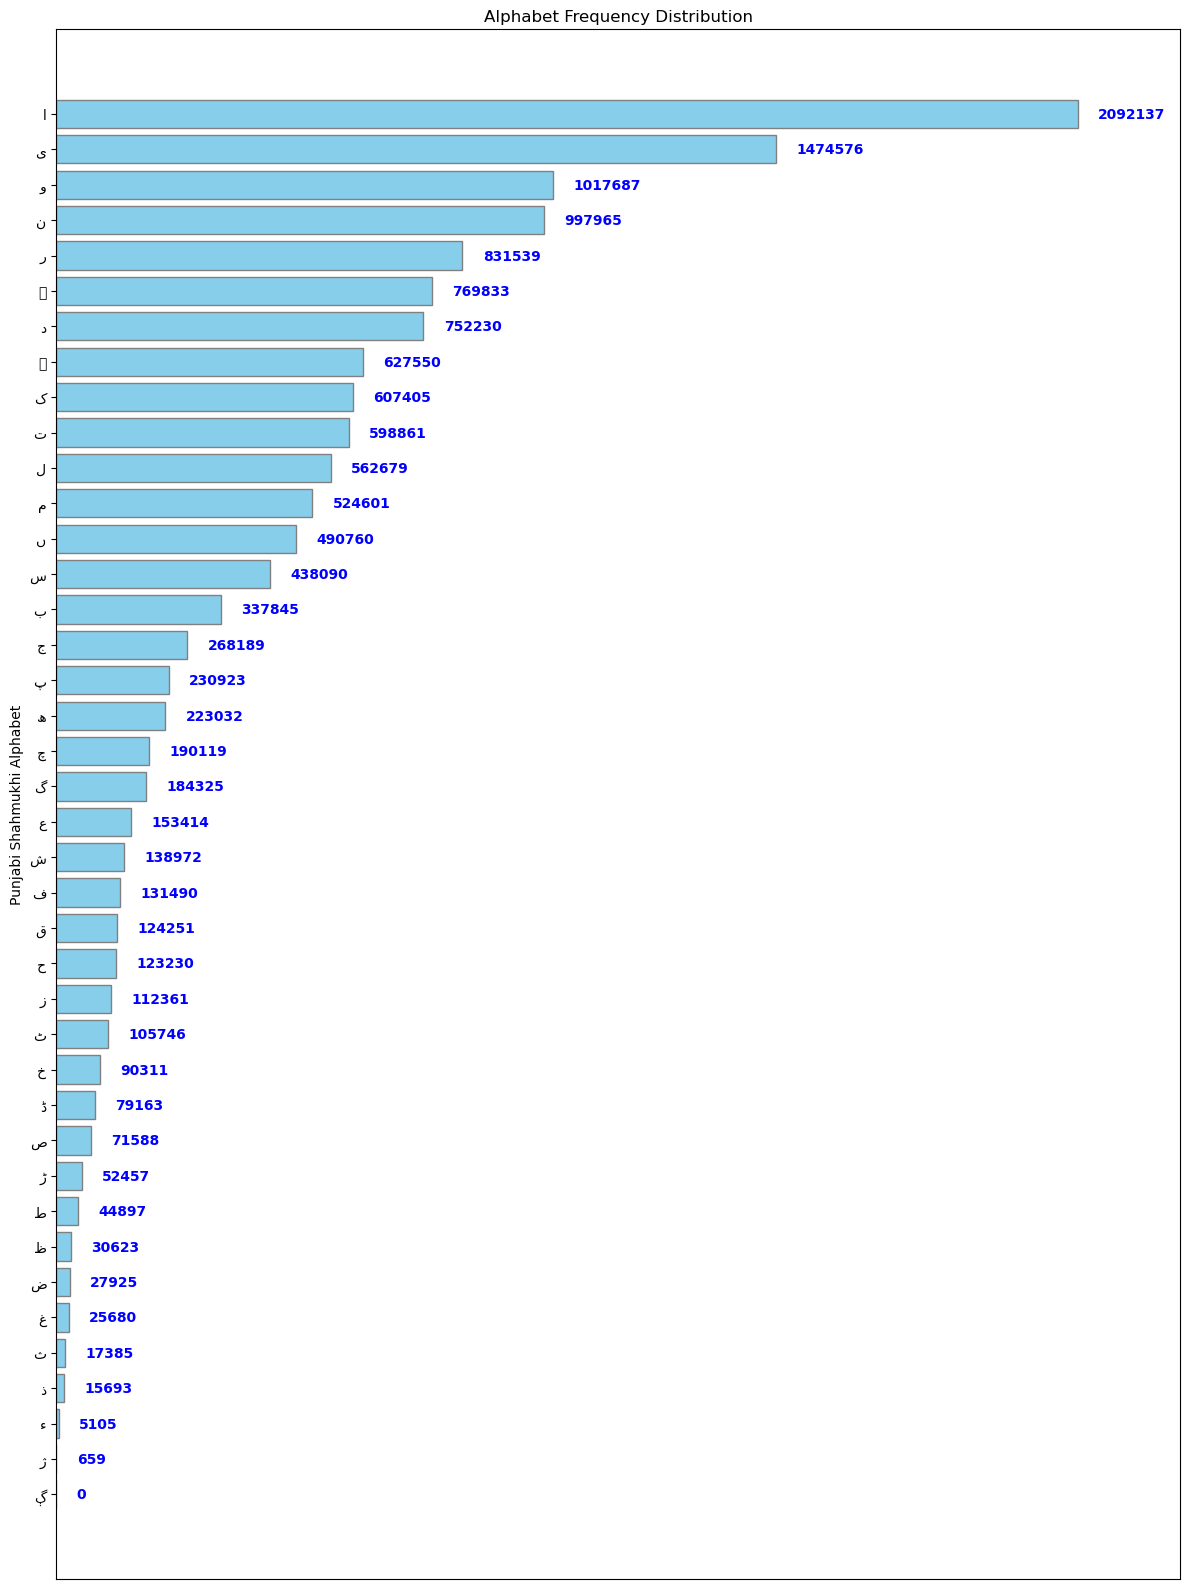

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

# Define the alphabet for the specific language
shahmukhi_letters = ['ا', 'ب', 'پ', 'ت', 'ٹ', 'ث', 'ج', 'چ', 'ح', 'خ', 'د', 'ڈ', 'ذ', 'ر', 'ڑ', 'ز', 'ژ', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ک', 'گ', 'ڳ', 'ل', 'م', 'ن', 'ں', 'و', 'ہ', 'ھ', 'ء', 'ی', 'ے']

# Load your dataset from the Excel file (change 'your_dataset.xlsx' to your file's name)
data_df = pd.read_excel('concatenated_data.xlsx')

# Create a dictionary to store the frequency of each alphabet
alphabet_frequency = {letter: 0 for letter in shahmukhi_letters}

# Iterate through the 'Shahmukhi' column in the dataset and count alphabet occurrences
for index, row in data_df.iterrows():
    text = str(row['Shahmukhi'])  # Convert to string to handle NaN values
    for letter in text:
        if letter in alphabet_frequency:
            alphabet_frequency[letter] += 1

# Sort the alphabet frequency dictionary by values (frequencies)
sorted_alphabet_frequency = dict(sorted(alphabet_frequency.items(), key=lambda item: item[1], reverse=True))

# Extract the sorted letters and frequencies
sorted_letters = list(sorted_alphabet_frequency.keys())
sorted_frequencies = list(sorted_alphabet_frequency.values())

# Increase the width and height of the figure
fig, ax = plt.subplots(figsize=(12, 16))

ax.barh([get_display(letter) for letter in sorted_letters], sorted_frequencies, color='skyblue', edgecolor='grey')
ax.set_xlabel('')
ax.set_ylabel('Punjabi Shahmukhi Alphabet')
ax.set_title('Alphabet Frequency Distribution')
ax.invert_yaxis()  # Invert the y-axis to display the highest count at the top
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Set a specific limit for the x-axis (adjust as needed)
ax.set_xlim(0, max(sorted_frequencies) + max(sorted_frequencies) * 0.1)

# Adjust the horizontal position and spacing for count annotations
max_frequency = max(sorted_frequencies)
for i, v in enumerate(sorted_frequencies):
    ax.text(v + max_frequency * 0.02, i, str(v), color='blue', va='center', fontweight='bold')

# Remove x-axis ticks and labels
ax.set_xticks([])

# Tight layout for better aesthetics
plt.tight_layout()

# Save the graph as a high-quality image (e.g., PNG)
plt.savefig('alphabet_frequency_graph.png', dpi=300, bbox_inches='tight')

# Display the horizontal bar graph
plt.show()
